In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from skimage import filters, feature, exposure, restoration, transform, util, color

In [2]:
from google.colab import files
uploaded = files.upload()

Saving moon.jpg to moon.jpg


In [3]:
# Read the image as grayscale
image = cv2.imread("moon.jpg", cv2.IMREAD_GRAYSCALE)

In [4]:
# Helper function to display images
def show(img, title='', cmap='gray'):
    plt.figure(figsize=(6, 6))
    plt.imshow(img, cmap=cmap)
    plt.title(title)
    plt.axis('off')
    plt.show()

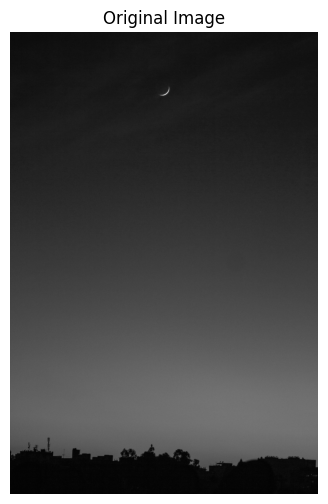

In [5]:
show(image, 'Original Image')

In [6]:
# LoG (Laplacian of Gaussian)
log_blobs = feature.blob_log(image, max_sigma=30, num_sigma=10, threshold=0.1)

In [7]:
dog_blobs = feature.blob_dog(image, max_sigma=30, threshold=0.1)

In [8]:
doh_blobs = feature.blob_doh(image, max_sigma=30, threshold=0.01)

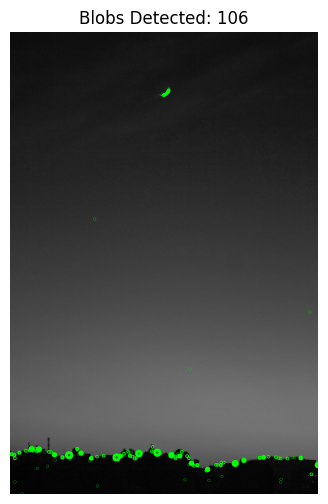

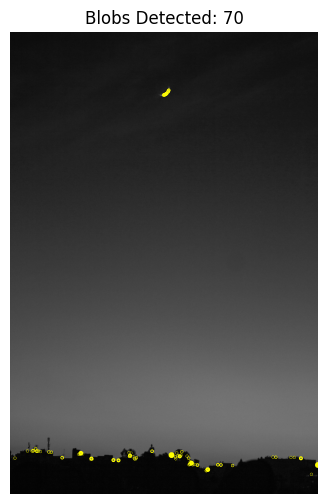

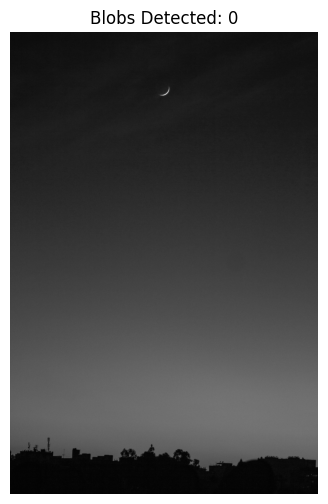

In [9]:
# Draw blobs
def draw_blobs(img, blobs, color='red'):
    fig, ax = plt.subplots(figsize=(6, 6))
    ax.imshow(img, cmap='gray')
    for blob in blobs:
        y, x, r = blob
        c = plt.Circle((x, y), r, color=color, linewidth=2, fill=False)
        ax.add_patch(c)
    plt.title(f'Blobs Detected: {len(blobs)}')
    plt.axis('off')
    plt.show()

draw_blobs(image, log_blobs, 'lime')
draw_blobs(image, dog_blobs, 'yellow')
draw_blobs(image, doh_blobs, 'red')

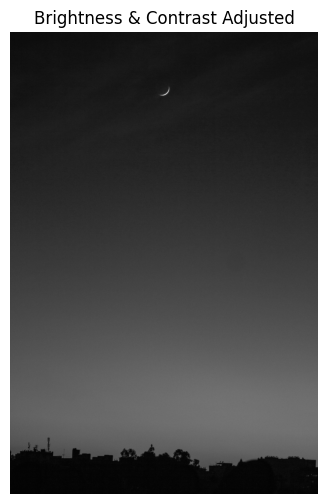

In [10]:
# Brightness and Contrast Adjustment
bright = exposure.rescale_intensity(image, in_range='image')
show(bright, 'Brightness & Contrast Adjusted')

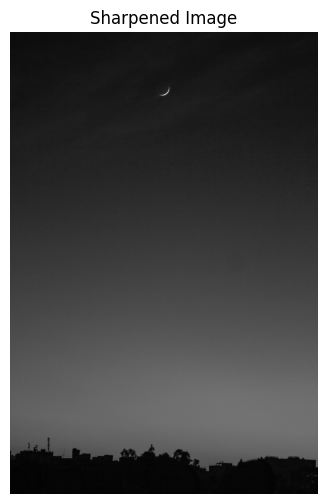

In [11]:

# Sharpening
sharpened = filters.unsharp_mask(image, radius=1, amount=1)
show(sharpened, 'Sharpened Image')

In [13]:
# Noise Removal (Wavelet Denoising)
from skimage import restoration

In [15]:
!pip install PyWavelets

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.5/4.5 MB 31.2 MB/s eta 0:00:00


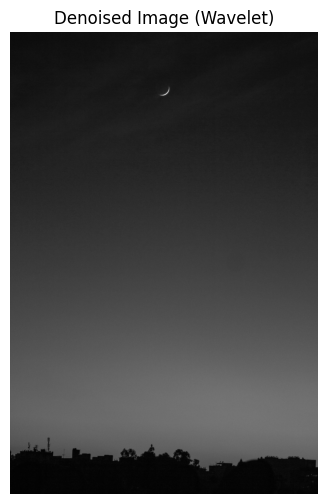

In [16]:
from skimage import restoration

# For grayscale image, channel_axis=None
denoised = restoration.denoise_wavelet(image, channel_axis=None)
show(denoised, 'Denoised Image (Wavelet)')

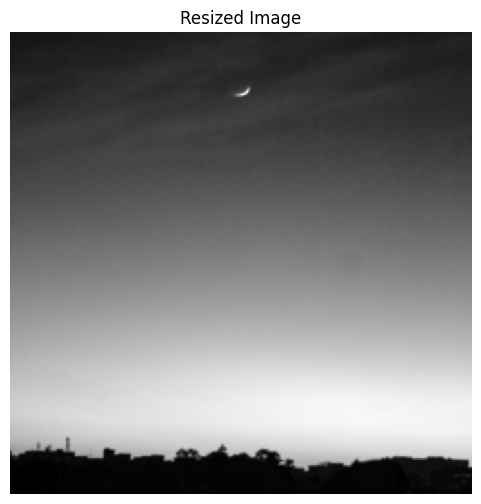

In [17]:
# Resizing
resized = transform.resize(image, (256, 256))
show(resized, 'Resized Image')

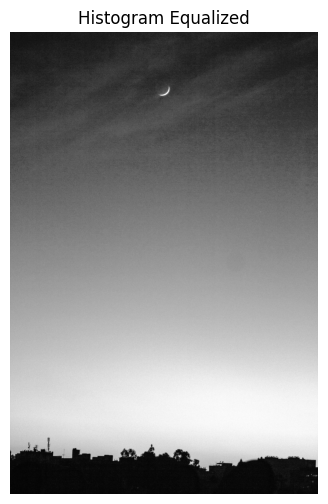

In [18]:
# Histogram Equalization
equalized = exposure.equalize_hist(image)
show(equalized, 'Histogram Equalized')

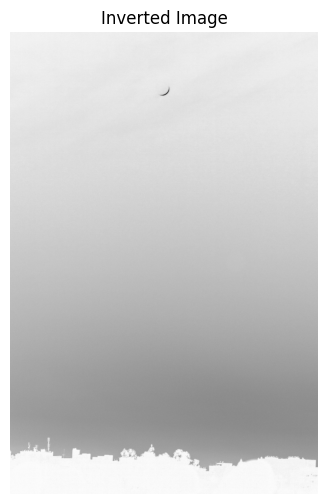

In [19]:
# Inverted Image
inverted = util.invert(image)
show(inverted, 'Inverted Image')